This notebook analyses and compares and SA1s in Inner Melbourne and Sydney: City and Inner South. The area being analysed for Melbourne is much larger than Sydney, with more SA1s. This is due to the difference in how the SA4s are laid out for both cities. 

Both areas being analysed encompass the CBDs of the respective cities (though, North Sydney is not considered).

In [164]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns

%matplotlib inline

In [165]:
dframe = pd.read_csv('data/innermelbourne.csv')
dframe.columns = dframe.columns.str.strip() #To fix formatting issues with headers

In [166]:
#Dropping columns deemed irrelevant
aframe = dframe.drop(['gcc_name11','gcc_code11','sa2_5dig11','sa1_7dig11','sa3_code11','sa4_code11','ste_code11','ste_name11'],axis=1)

In [167]:
#Group by SA2 suburb
avg_sa2 = aframe[['sa2_name11','SumZScore']].groupby('sa2_name11').mean()

#Group by SA3 area
avg_sa3 = aframe[['sa3_name11','SumZScore']].groupby('sa3_name11').mean()

A quick look at the SA2 and SA3 groupings for Melbourne, and the average walkability scores (represented by 'SumZScore').

In [168]:
avg_sa3

SumZScore
sa3_name11                   
Brunswick - Coburg  -1.442297
Darebin - South     -1.705241
Essendon            -1.501010
Melbourne City       2.551466
Port Phillip         0.256828
Stonnington - West   0.053694
Yarra                0.446783

In [169]:
avg_sa2

SumZScore
sa2_name11                             
Abbotsford                     0.847583
Albert Park                    0.425471
Alphington - Fairfield        -2.055192
Armadale                      -1.016522
Ascot Vale                    -1.463378
Brunswick                     -0.680594
Brunswick East                -0.417797
Brunswick West                -1.725236
Carlton                        2.698953
Carlton North - Princes Hill  -0.955973
Coburg                        -1.852370
Collingwood                    1.015557
Docklands                      1.168116
East Melbourne                 0.954821
Elwood                        -0.626253
Essendon - Aberfeldie         -2.004841
Fitzroy                        1.344740
Fitzroy North                  0.204232
Flemington                    -0.136415
Kensington                     1.062515
Melbourne                      3.547425
Moonee Ponds                  -1.473731
North Melbourne                1.697015
Northcote                     -1.240260
Parkville                      0.655882
Pascoe Vale South             -2.406909
Port Melbourne                 0.927201
Port Melbourne Industrial     -1.290091
Prahran - Windsor              1.201360
Richmond (Vic.)                0.836230
South Melbourne                1.838322
South Yarra - East             1.249292
South Yarra - West             0.823606
Southbank                      6.816946
St Kilda                       0.652861
St Kilda East                 -1.086723
Thornbury                     -2.108694
Toorak                        -1.939547
Yarra - North                 -0.451671

In [170]:
sframe = pd.read_csv('data/sydcityinnersouthresults.csv')
sframe.columns = sframe.columns.str.strip()

In [171]:
bframe = sframe.drop(['gcc_name11','gcc_code11','sa2_5dig11','sa1_7dig11','sa3_code11','sa4_code11','ste_code11','ste_name11'],axis=1)

In [172]:
#Counting the SA1s in Melbourne and Sydney
print "SA1s in Melbourne: "+ str(len(aframe.index))
print "SA1s in Sydney: "+ str(len(bframe.index))

SA1s in Melbourne: 1185
SA1s in Sydney: 628


In [173]:
#Group by SA2 suburb
savg_sa2 = bframe[['sa2_name11','SumZScore']].groupby('sa2_name11').mean()
# savg_sa2.reset_index()
# savg_sa2.columns = ['SA2 Name','Walkability Index']

#Group by SA3 area
savg_sa3 = bframe[['sa3_name11','SumZScore']].groupby('sa3_name11').mean()
# savg_sa2.reset_index()
# savg_sa3.columns = ['SA2 Name','Walkability Index']


In [191]:
#Counting the SA1s in Melbourne and Sydney
print "SA1s in Melbourne: "+ str(len(avg_sa2.index))
print "SA1s in Sydney: "+ str(len(savg_sa2.index))

SA1s in Melbourne: 39
SA1s in Sydney: 17


A look at Sydney's SA2 and SA3 grouping, and average Walkability Scores.

In [174]:
savg_sa3

SumZScore
sa3_name11                                    
Botany                               -1.466938
Marrickville - Sydenham - Petersham  -1.057064
Sydney Inner City                     0.697534

In [175]:
savg_sa2

SumZScore
sa2_name11                                  
Banksmeadow                        -5.089664
Botany                             -2.020042
Darlinghurst                        2.300351
Erskineville - Alexandria          -0.070819
Glebe - Forest Lodge                0.205308
Marrickville                       -1.379702
Mascot - Eastlakes                 -1.152618
Newtown - Camperdown - Darlington   1.066498
Pagewood - Hillsdale - Daceyville  -1.419358
Petersham - Stanmore               -0.930810
Potts Point - Woolloomooloo         1.295943
Pyrmont - Ultimo                   -0.934770
Redfern - Chippendale               0.654447
Surry Hills                         1.903201
Sydenham - Tempe - St Peters       -0.429833
Sydney - Haymarket - The Rocks      1.403998
Waterloo - Beaconsfield            -0.727512

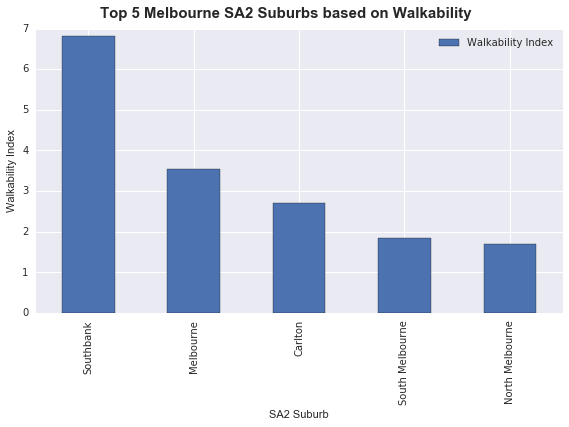

In [176]:
#Top 5 SA2 suburbs Melbourne
top_sa2_melb = avg_sa2.sort_values('SumZScore',ascending=False).head(5).plot(kind='bar',figsize=(8,6))

top_sa2_melb.set_ylabel('Walkability Index') #Setting the Y label
top_sa2_melb.set_xlabel('SA2 Suburb') #Setting the X label
top_sa2_melb.legend(['Walkability Index'])
fig_top_sa2_melb = top_sa2_melb.get_figure() #Assigning the figure to a new variable for further operations
fig_top_sa2_melb.tight_layout() #To fit everything in the saved image
fig_top_sa2_melb.subplots_adjust(top=0.93)
fig_top_sa2_melb.suptitle('Top 5 Melbourne SA2 Suburbs based on Walkability',fontsize=15,fontweight='bold') #Title for the figure
fig_top_sa2_melb.savefig("figures/top_5_melbourne_sa2.png") 

We can see from the plot above that the suburb 'Southbank', has twice the walkability score of the next highest suburb 'Melbourne'. So it might be possible that it impacts our comparison later.

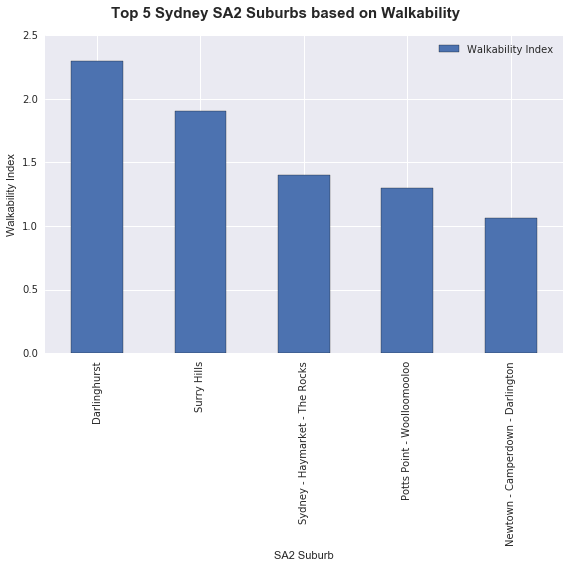

In [177]:
#Top 5 Suburbs Sydney
top_sa2_syd = savg_sa2.sort_values('SumZScore',ascending=False).head(5).plot(kind='bar',figsize=(8,8))


top_sa2_syd.set_ylabel('Walkability Index') #Setting the Y label
top_sa2_syd.set_xlabel('SA2 Suburb') #Setting the X label
top_sa2_syd.legend(['Walkability Index'])
fig_top_sa2_syd = top_sa2_syd.get_figure() #Assigning the figure to a new variable for further operations
fig_top_sa2_syd.tight_layout() #To fit everything in the saved image
fig_top_sa2_syd.subplots_adjust(top=0.93)
fig_top_sa2_syd.suptitle('Top 5 Sydney SA2 Suburbs based on Walkability',fontsize=15,fontweight='bold') #Title for the figure
fig_top_sa2_syd.savefig("figures/top_5_sydney_sa2.png") 

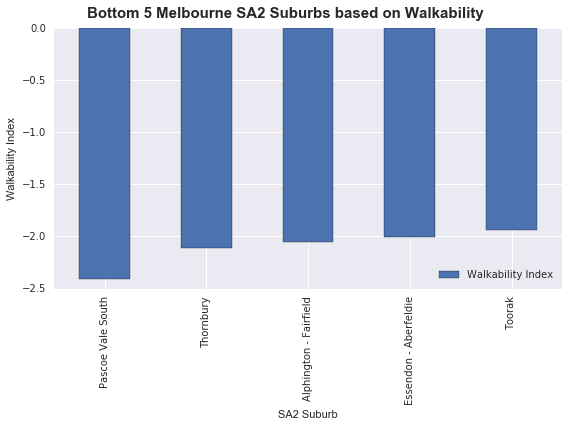

In [178]:
#Least 5 Suburbs Melbourne
bot_sa2_melb = avg_sa2.sort_values('SumZScore',ascending=True).head(5).plot(kind='bar',figsize=(8,6))

bot_sa2_melb.set_ylabel('Walkability Index') #Setting the Y label
bot_sa2_melb.set_xlabel('SA2 Suburb') #Setting the X label
bot_sa2_melb.legend(['Walkability Index'],loc=4)
fig_bot_sa2_melb = bot_sa2_melb.get_figure() #Assigning the figure to a new variable for further operations
fig_bot_sa2_melb.tight_layout() #To fit everything in the saved image
fig_bot_sa2_melb.subplots_adjust(top=0.93)
fig_bot_sa2_melb.suptitle('Bottom 5 Melbourne SA2 Suburbs based on Walkability',fontsize=15,fontweight='bold') #Title for the figure
fig_bot_sa2_melb.savefig("figures/bottom_5_melbourne_sa2.png")

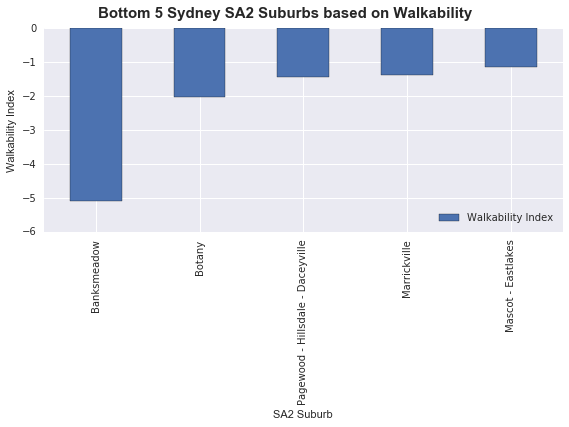

In [193]:
bot_sa2_syd = savg_sa2.sort_values('SumZScore').head(5).plot(kind='bar',figsize=(8,6))

bot_sa2_syd.set_ylabel('Walkability Index') #Setting the Y label
bot_sa2_syd.set_xlabel('SA2 Suburb') #Setting the X label
bot_sa2_syd.legend(['Walkability Index'],loc=4)
fig_bot_sa2_syd = bot_sa2_syd.get_figure() #Assigning the figure to a new variable for further operations
fig_bot_sa2_syd.tight_layout() #To fit everything in the saved image
fig_bot_sa2_syd.subplots_adjust(top=0.93)
fig_bot_sa2_syd.suptitle('Bottom 5 Sydney SA2 Suburbs based on Walkability',fontsize=15,fontweight='bold') #Title for the figure
fig_bot_sa2_syd.savefig("figures/bottom_5_sydney_sa2.png")

We can see from the above bar plot, that Sydney has somewhat of an 'anti Southbank'. The SA2 suburb, Banksmeadow has a twice as low walkability score than the next worse suburb, Botany.

In [180]:
#Calculating the average walkabiity score for Inner Melbourne
avg_sa4 = aframe[['sa4_name11','SumZScore']].round(2).groupby('sa4_name11').mean()
avg_sa4

SumZScore
sa4_name11                  
Melbourne - Inner  -0.000008

In [181]:
#Calculating the average walkability score for Sydney City and Inner South
savg_sa4 = bframe[['sa4_name11','SumZScore']].round(2).groupby('sa4_name11').mean()
savg_sa4

SumZScore
sa4_name11                              
Sydney - City and Inner South  -0.000127

The above walkability scores are a bit unintitive to analyse, so let's plot them on a figure.

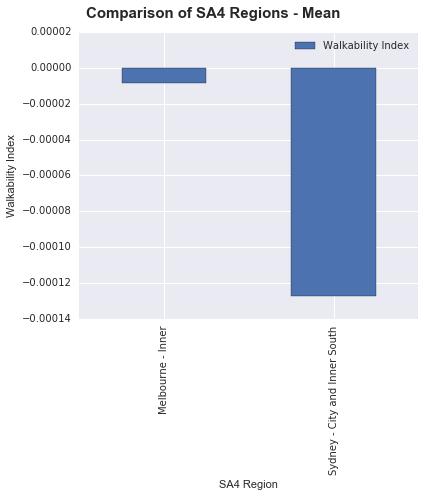

In [182]:
melb_syd_avg_sa4_fig = pd.concat([avg_sa4,savg_sa4]).plot(kind='bar',figsize=(6,7))

melb_syd_avg_sa4_fig.set_ylabel('Walkability Index') #Setting the Y label
melb_syd_avg_sa4_fig.set_xlabel('SA4 Region') #Setting the X label
melb_syd_avg_sa4_fig.legend(['Walkability Index'],loc=1)
fig_melb_syd_avg_sa4 = melb_syd_avg_sa4_fig.get_figure() #Assigning the figure to a new variable for further operations
fig_melb_syd_avg_sa4.tight_layout() #To fit everything in the saved image
fig_melb_syd_avg_sa4.subplots_adjust(top=0.93)
fig_melb_syd_avg_sa4.suptitle('Comparison of SA4 Regions - Mean',fontsize=15,fontweight='bold') #Title for the figure
fig_melb_syd_avg_sa4.savefig("figures/melb_syd_avg_sa4.png")

We can see the Melbourne has somewhat, if not substantially, better walkability than Sydney. But is that really true? 

We noticed that while Melbourne has 'Southbank', an SA2 with almost twice the walkability index of the second top suburb, 'Melbourne City', Sydney has its own 'anti-Southbank' with 'Banksmeadow', a dockland area with walkability more than twice worse off than the next worst SA2.

So what if we represented the aggregate walkability using medians, rather than averages?

In [183]:
median_sa4 = aframe[['sa4_name11','SumZScore']].round(2).groupby('sa4_name11').median()
median_sa4

SumZScore
sa4_name11                  
Melbourne - Inner      -0.28

In [184]:
smedian_sa4 = bframe[['sa4_name11','SumZScore']].round(2).groupby('sa4_name11').median()
smedian_sa4

SumZScore
sa4_name11                              
Sydney - City and Inner South     -0.205

We can already see that Sydney peforms a bit better than Melbourne, but let's plot it on a figure anyways.

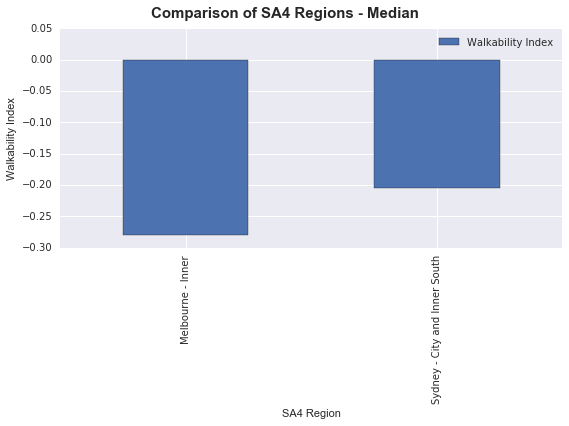

In [185]:
melb_syd_median_sa4_fig = pd.concat([median_sa4,smedian_sa4]).plot(kind='bar',figsize=(8,6))

melb_syd_median_sa4_fig.set_ylabel('Walkability Index') #Setting the Y label
melb_syd_median_sa4_fig.set_xlabel('SA4 Region') #Setting the X label
melb_syd_median_sa4_fig.legend(['Walkability Index'],loc=1)
fig_melb_syd_median_sa4 = melb_syd_median_sa4_fig.get_figure() #Assigning the figure to a new variable for further operations
fig_melb_syd_median_sa4.tight_layout() #To fit everything in the saved image
fig_melb_syd_median_sa4.subplots_adjust(top=0.93)
fig_melb_syd_median_sa4.suptitle('Comparison of SA4 Regions - Median',fontsize=15,fontweight='bold') #Title for the figure
fig_melb_syd_median_sa4.savefig("figures/melb_syd_median_sa4.png")

Now we see that Sydney has a better median walkability than Melbourne. It's possible that the median is a better metric to compare the two cities, as it is not affected by outliers.

So, as some extra analysis, why don't we take out both Southbank and Bankstown, the two outliers in the Melbourne and Sydney datasets, and calculate the mean again.

In [186]:
aframe_no_southbank = aframe[aframe.sa2_name11 != 'Southbank']
bframe_no_banksmeadow = bframe[bframe.sa2_name11 != 'Banksmeadow']

Now to calculate average walkabilities of the two cities.

In [187]:
avg_sa4_no_south = aframe_no_southbank[['sa4_name11','SumZScore']].round(2).groupby('sa4_name11').mean()
avg_sa4_no_south

SumZScore
sa4_name11                  
Melbourne - Inner  -0.164996

In [188]:
savg_sa4_no_banks = bframe_no_banksmeadow[['sa4_name11','SumZScore']].round(2).groupby('sa4_name11').mean()
savg_sa4_no_banks

SumZScore
sa4_name11                              
Sydney - City and Inner South    0.00799

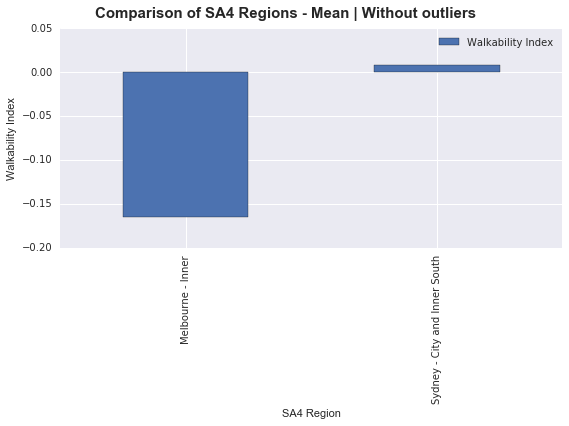

In [189]:
melb_syd_avg_sa4_no_fig = pd.concat([avg_sa4_no_south,savg_sa4_no_banks]).plot(kind='bar',figsize=(8,6))

melb_syd_avg_sa4_no_fig.set_ylabel('Walkability Index') #Setting the Y label
melb_syd_avg_sa4_no_fig.set_xlabel('SA4 Region') #Setting the X label
melb_syd_avg_sa4_no_fig.legend(['Walkability Index'],loc=1)
fig_melb_syd_avg_sa4_no = melb_syd_avg_sa4_no_fig.get_figure() #Assigning the figure to a new variable for further operations
fig_melb_syd_avg_sa4_no.tight_layout() #To fit everything in the saved image
fig_melb_syd_avg_sa4_no.subplots_adjust(top=0.93)
fig_melb_syd_avg_sa4_no.suptitle('Comparison of SA4 Regions - Mean | Without outliers',fontsize=15,fontweight='bold') #Title for the figure
fig_melb_syd_avg_sa4_no.savefig("figures/melb_syd_avg_sa4_no_outliers.png")

We can check out how important 'Southbank' and 'Banksmeadow' are to Melbourne or Sydney's Walkability by taking the absolute difference of the means with and without those outliers.

In [190]:
#All means
print avg_sa4 
print savg_sa4
print avg_sa4_no_south
print savg_sa4_no_banks
print "\n\n"
print "Differences"

print abs(avg_sa4 - avg_sa4_no_south)
print abs(savg_sa4 - savg_sa4_no_banks)

                   SumZScore
sa4_name11                  
Melbourne - Inner  -0.000008
                               SumZScore
sa4_name11                              
Sydney - City and Inner South  -0.000127
                   SumZScore
sa4_name11                  
Melbourne - Inner  -0.164996
                               SumZScore
sa4_name11                              
Sydney - City and Inner South    0.00799



Differences
                   SumZScore
sa4_name11                  
Melbourne - Inner   0.164987
                               SumZScore
sa4_name11                              
Sydney - City and Inner South   0.008118
